$dtauda=\dfrac{d\tau}{da}=\dfrac{dt}{ada}=\dfrac{a}{\dot{a}}$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [23]:
def function(t, z, kC1, O10, H0):
    # z[0] = z(t), z[1] = z'(t), z[2] = z''(t)
    dz1 = z[1]
    up = H0**4 * kC1 * O10**2 * (z[0]**4+1) + 3 * H0**4 * O10**2 * z[0]**2 * (2 * kC1-3 * z[1]) \
        + H0**4 * O10**2 * z[0]**3 * (4 * kC1 - 3 * z[1]) - 3 * H0**4 * O10**2 * z[1] + 5 * H0**2 * O10 * z[1]**3\
            - kC1 * z[1]**4 + H0**2 * O10 * z[0] * (4 * H0**2 * kC1 * O10 - 9 * H0**2 * O10 * z[1] + 5 * z[1]**3)
    down = 2 * H0**2 * O10 * (1 + z[0])**2 * z[1]
    dz2 = up / down
    return [dz1, dz2]

In [24]:
def solution(log_kC1, O20, H0):
    kC1 = 10**log_kC1
    O10 = 1 - O20
    t0 = 1 / H0
    # 求解区间
    tspan = (t0, 0)
    tn = np.linspace(t0, 0, 100000)
    # 从t0开始
    zt0 = [0, -H0]

    # t0给定初值
    z = scipy.integrate.solve_ivp(function, t_span=tspan, y0=zt0, t_eval=tn, method='RK45', args=(kC1, O10, H0))
    # z.y[0,:] = z(t), z.y[1,:] = z'(t)
    return z

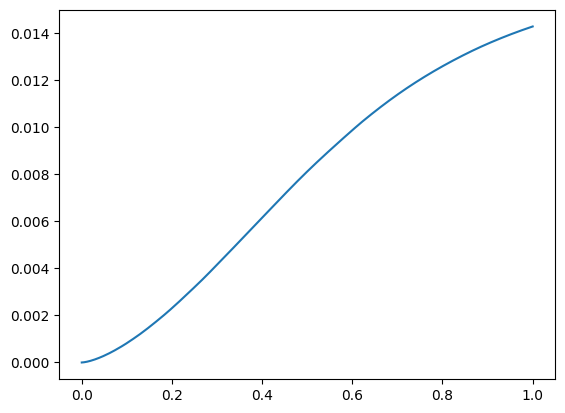

In [25]:
z = solution(-3, 0.3, 70)
a = 1 / (1 + z.y[0,:])
dota = -z.y[1,:] * a ** 2
dtauda = a / dota
a = np.concatenate((a, [0]))
dtauda = np.concatenate((dtauda, [0]))
plt.plot(a, dtauda)

In [26]:
# 将a和dtauda一起保存到同一个txt文件中，每行一个a值和对应的dtauda值
data = np.vstack((a, dtauda)).T
np.savetxt("temp.txt", data)

```fortran
function dtauda(this,a)

use results
use DarkEnergyInterface

implicit none
class(CAMBdata) :: this
real(dl), intent(in) :: a
real(dl) :: dtauda
real(dl), allocatable :: a_list(:), dtauda_list(:)
integer :: i

open(10, file='D:\Yixuan Zhu\Astro-Physics\IDM\CMB\temp.txt')
read(10, *) ((a_list(i), dtauda_list(i)),i=1,1e6)
close(10)

do i = 1, 1e6
    if (a <= a_list(i) .and. a >= a_list(i+1)) then
        dtauda = (dtauda_list(i+1)-dtauda_list(i))/(a_list(i+1)-a_list(i))*(a-a_list(i+1))+dtauda_list(i+1)
        exit
    end if
end do

end function dtauda
```